# Graph Visualizations
In this notebook we will create visualizations used for explanatory reasons in the article. We will use the [NetworkX](https://networkx.github.io/) library to visualize the graphs.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from visual import save_pdf
from product.product_operator import PRODUCTS

## Visualization of Factor Graphs

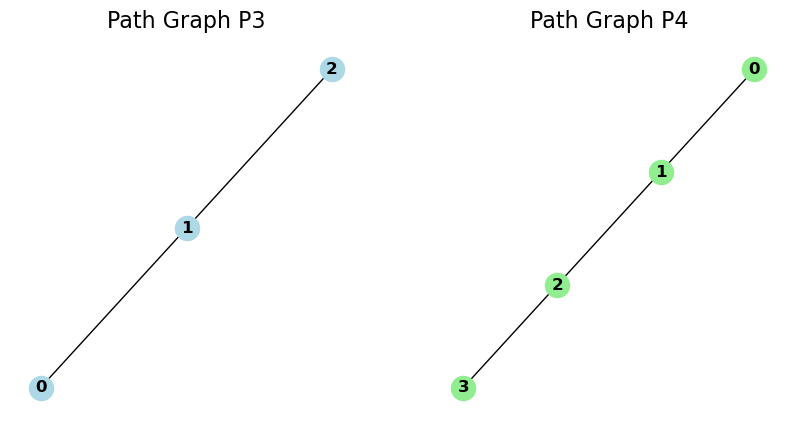

In [2]:
# Define the graphs P3 and P4
P3 = nx.path_graph(3)
P4 = nx.path_graph(4)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Original Graphs
nx.draw(P3, ax=axes[0], with_labels=True, node_color='lightblue', font_weight='bold')
axes[0].set_title("Path Graph P3", fontsize=16)
nx.draw(P4, ax=axes[1], with_labels=True, node_color='lightgreen', font_weight='bold')
axes[1].set_title("Path Graph P4", fontsize=16)
plt.show()

# Save the figure
save_pdf(fig, 'graph_factor_examples')

## Visualization of graph products

In [3]:
# Create Cartesian, Strong, Tensor, Modular, and Lexicographic Products
products = {k: v(P3, P4) for k, v in PRODUCTS.items()}

# Define grid layout for all plots
pos = {}
for node in products['Cartesian']:
    row, col = node
    pos[node] = (col, -row)

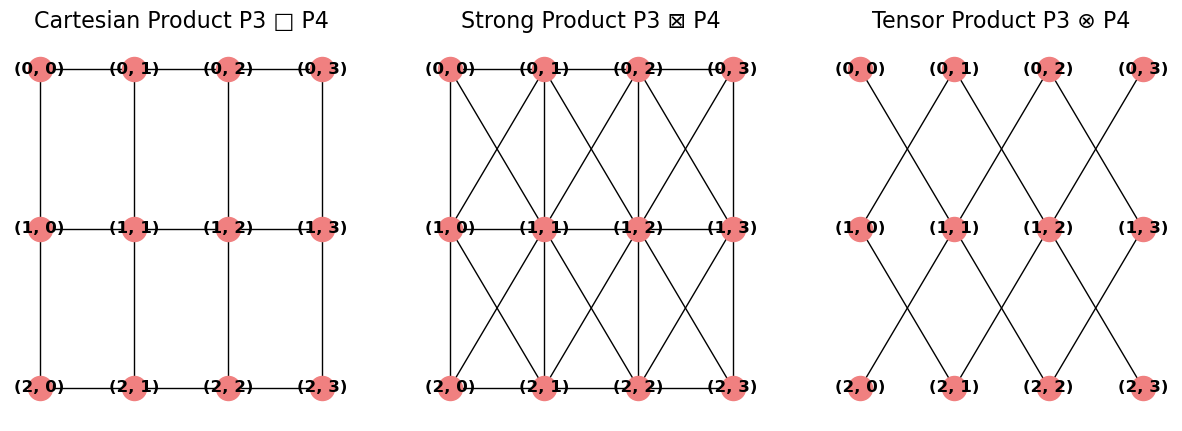

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Cartesian Product
nx.draw(products['Cartesian'], pos=pos, ax=axes[0], with_labels=True, node_color='lightcoral', font_weight='bold')
axes[0].set_title("Cartesian Product P3 □ P4", fontsize=16)

# Strong Product
nx.draw(products['Strong'], pos=pos, ax=axes[1], with_labels=True, node_color='lightcoral', font_weight='bold')
axes[1].set_title("Strong Product P3 ⊠ P4", fontsize=16)

# Tensor Product
nx.draw(products['Tensor'], pos=pos, ax=axes[2], with_labels=True, node_color='lightcoral', font_weight='bold')
axes[2].set_title("Tensor Product P3 ⊗ P4", fontsize=16)

plt.show()

# Save the figure
save_pdf(fig, 'graph_product_examples_cst')

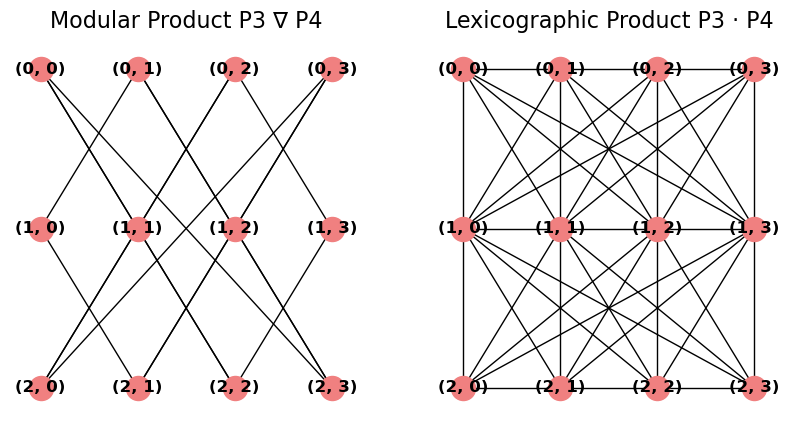

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Modular Product
nx.draw(products['Modular'], pos=pos, ax=axes[0], with_labels=True, node_color='lightcoral', font_weight='bold')
axes[0].set_title("Modular Product P3 ∇ P4", fontsize=16)

# Lexicographic Product
nx.draw(products['Lexicographic'], pos=pos, ax=axes[1], with_labels=True, node_color='lightcoral', font_weight='bold')
axes[1].set_title("Lexicographic Product P3 · P4", fontsize=16)

plt.show()

# Save the figure
save_pdf(fig, 'graph_product_examples_ml')

# Complete, Path and Star Graphs

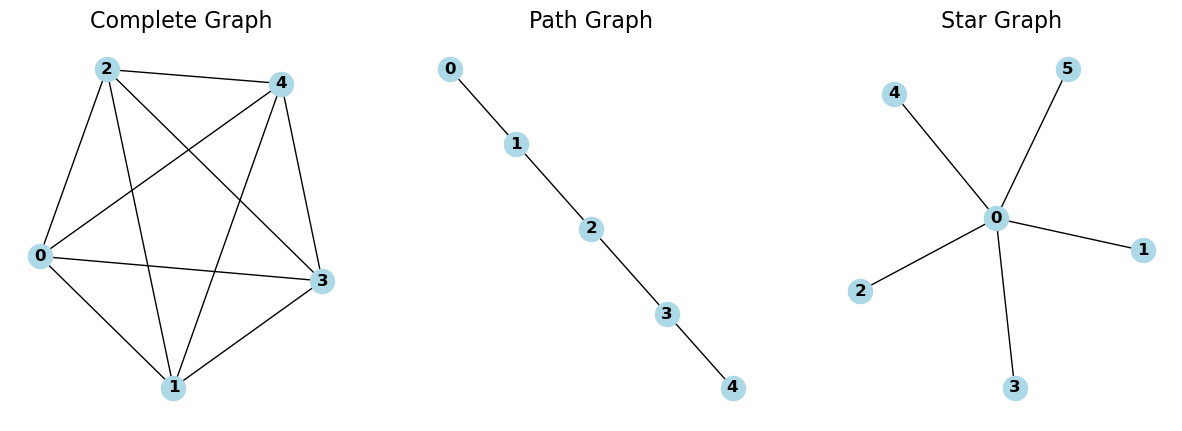

In [6]:
# Create Complete, Path and Star Graph with 5 nodes
complete_graph = nx.complete_graph(5)
path_graph = nx.path_graph(5)
star_graph = nx.star_graph(5)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Complete Graph
nx.draw(complete_graph, ax=ax[0], with_labels=True, node_color='lightblue', font_weight='bold')
ax[0].set_title("Complete Graph", fontsize=16)

# Path Graph
nx.draw(path_graph, ax=ax[1], with_labels=True, node_color='lightblue', font_weight='bold')
ax[1].set_title("Path Graph", fontsize=16)

# Star Graph
nx.draw(star_graph, ax=ax[2], with_labels=True, node_color='lightblue', font_weight='bold')
ax[2].set_title("Star Graph", fontsize=16)

plt.show()

# Save the figure
save_pdf(fig, 'used_factor_graphs')


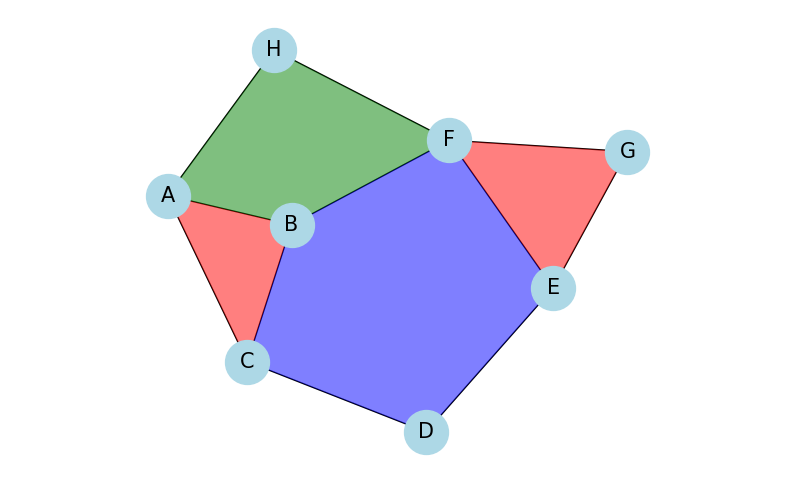

In [7]:
# Manually define the graph based on the image provided
edges = [('D', 'E'), ('F', 'E'), ('F', 'B'), ('B', 'C'), ('C', 'D'), ('E', 'G'), ('G', 'F'), ('C', 'A'), ('A', 'B'), ('A', 'H'), ('H', 'F')]
G = nx.Graph()
G.add_edges_from(edges)

# Manually define the cycles for the visualization
cycles = [['C', 'B', 'A'], ['E', 'G', 'F'], ['A', 'B', 'F', 'H'], ['D', 'C', 'B', 'F', 'E']]
# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the graph
pos = nx.spring_layout(G, seed=2)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=15, ax=ax)

# Function to get patch for a cycle
def get_cycle_patch(cycle, pos):
    cycle_pos = [pos[node] for node in cycle]
    poly = patches.Polygon(cycle_pos, closed=True, fill=True, edgecolor='none')
    return poly

# Plot the cycles with different colors
colors = ['yellow', 'purple', 'green', 'red', 'green', 'blue']

for i, cycle in enumerate(cycles):
    patch = get_cycle_patch(cycle, pos)
    patch.set_facecolor(colors[len(cycle)])
    patch.set_alpha(0.5)
    ax.add_patch(patch)
    
# Display the plot
plt.axis('equal')
plt.show()

# Save the figure
save_pdf(fig, 'cycle_example')